# PCA Results: Scratch vs. Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Load and Clean Data

In [2]:
Auto = pd.read_csv('Auto.csv')
Auto = Auto[Auto['horsepower'] != '?']
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])
if 'name' in Auto.columns:
    Auto = Auto.drop(columns=['name'])

print("Data Shape:", Auto.shape)

Data Shape: (392, 8)


## 2. Method 1: PCA from Scratch

In [3]:
# Standardize
X = Auto.values
mean = np.mean(X, axis=0)
X_centered = X - mean
std = np.std(X_centered, axis=0)
std[std == 0] = 1
X_scaled_scratch = X_centered / std

# Covariance Matrix
n = X_scaled_scratch.shape[0]
cov_matrix = (X_scaled_scratch.T @ X_scaled_scratch) / (n - 1)

# Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort
idx = np.argsort(eigenvalues)[::-1]
scratch_eigenvalues = eigenvalues[idx]
scratch_eigenvectors = eigenvectors[:, idx]

# Explained Variance Ratio
scratch_explained_variance_ratio = scratch_eigenvalues / np.sum(scratch_eigenvalues)

print("Scratch Eigenvalues:", scratch_eigenvalues[:5])

Scratch Eigenvalues: [5.38962134 0.94607672 0.81371946 0.4873993  0.18329415]


## 3. Method 2: PCA with Scikit-Learn

In [4]:
# Standardize
scaler = StandardScaler()
X_scaled_sklearn = scaler.fit_transform(Auto)

# PCA
pca = PCA()
pca.fit(X_scaled_sklearn)

sklearn_eigenvalues = pca.explained_variance_
sklearn_explained_variance_ratio = pca.explained_variance_ratio_

print("Sklearn Eigenvalues:", sklearn_eigenvalues[:5])

Sklearn Eigenvalues: [5.38962134 0.94607672 0.81371946 0.4873993  0.18329415]


## 4. Comparison Table

In [5]:
comparison_df = pd.DataFrame({
    'Component': range(1, len(scratch_eigenvalues) + 1),
    'Scratch Eigenvalues': scratch_eigenvalues,
    'Sklearn Eigenvalues': sklearn_eigenvalues,
    'Diff Eigenvalues': np.abs(scratch_eigenvalues - sklearn_eigenvalues),
    'Scratch Var Ratio': scratch_explained_variance_ratio,
    'Sklearn Var Ratio': sklearn_explained_variance_ratio
})

print(comparison_df.round(6))

   Component  Scratch Eigenvalues  Sklearn Eigenvalues  Diff Eigenvalues  \
0          1             5.389621             5.389621               0.0   
1          2             0.946077             0.946077               0.0   
2          3             0.813719             0.813719               0.0   
3          4             0.487399             0.487399               0.0   
4          5             0.183294             0.183294               0.0   
5          6             0.114614             0.114614               0.0   
6          7             0.053684             0.053684               0.0   
7          8             0.032051             0.032051               0.0   

   Scratch Var Ratio  Sklearn Var Ratio  
0           0.671984           0.671984  
1           0.117958           0.117958  
2           0.101455           0.101455  
3           0.060769           0.060769  
4           0.022853           0.022853  
5           0.014290           0.014290  
6           0.006693 

## 5. Visual Comparison (Scree Plot)
Plotting the Explained Variance Ratio for both methods. The lines should overlap perfectly.

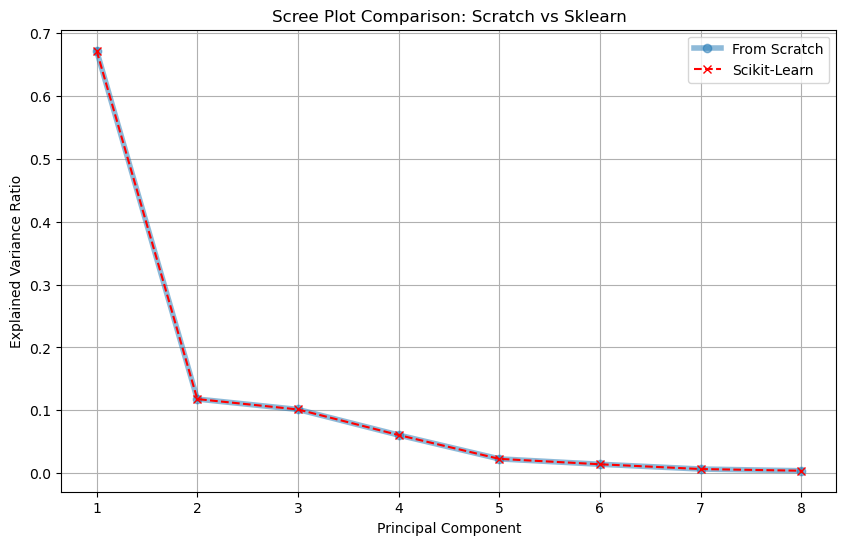

In [6]:
plt.figure(figsize=(10, 6))

# Plot Scratch
plt.plot(range(1, len(scratch_explained_variance_ratio) + 1), 
         scratch_explained_variance_ratio, 
         'o-', label='From Scratch', linewidth=4, alpha=0.5)

# Plot Sklearn
plt.plot(range(1, len(sklearn_explained_variance_ratio) + 1), 
         sklearn_explained_variance_ratio, 
         'x--', label='Scikit-Learn', color='red')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot Comparison: Scratch vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()